CNN filter

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import os
os.chdir("/content/drive/My Drive/Computer_Vision/Day02/Edge_Detection/")

In [45]:
import matplotlib.pyplot as plt
def display_img(img,cmap=None):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

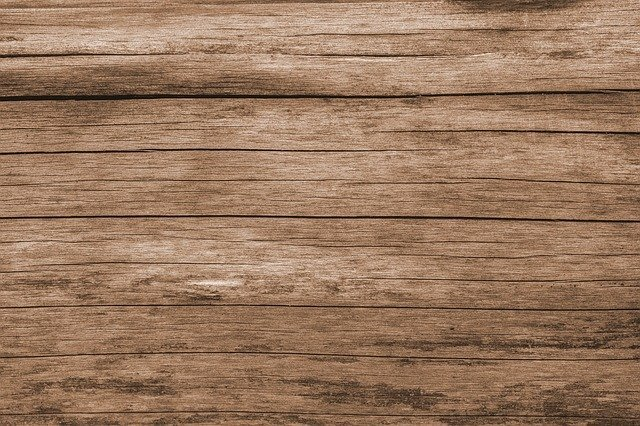

In [46]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 
image = cv2.imread('cnndemo.jpg')
"""
Apply identity kernel
"""
kernel1 = np.array([[0, 0, 0],
                    [0, 1, 0],
                    [0, 0, 0]])

# filter2D() function can be used to apply kernel to an image.
# Where ddepth is the desired depth of final image. ddepth is -1 if...
# ... depth is same as original or source image.
identity = cv2.filter2D(src=image, ddepth=-1, kernel=kernel1)
cv2_imshow(image)

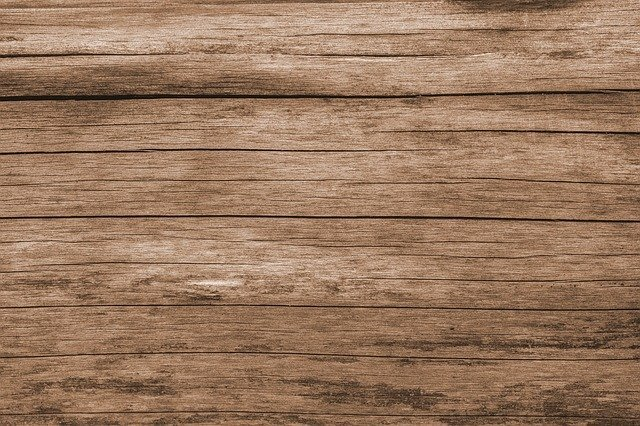

In [47]:
identity = cv2.filter2D(src=image, ddepth=-1, kernel=kernel1)
cv2_imshow(image)

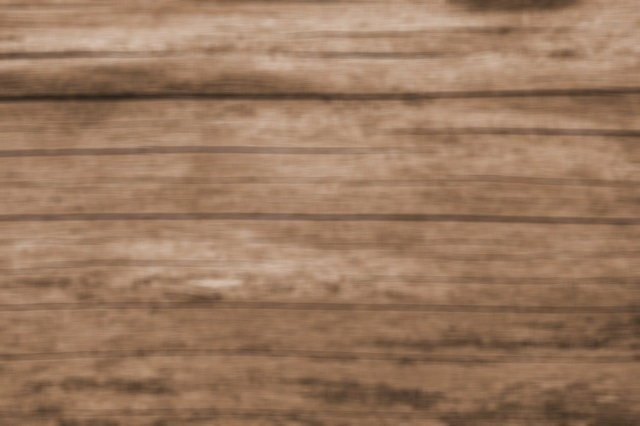

In [48]:
# custom filter
kernel2 = np.ones((7, 7), np.float32) / 49
img = cv2.filter2D(src=image, ddepth=-1, kernel=kernel2)
cv2_imshow(img)

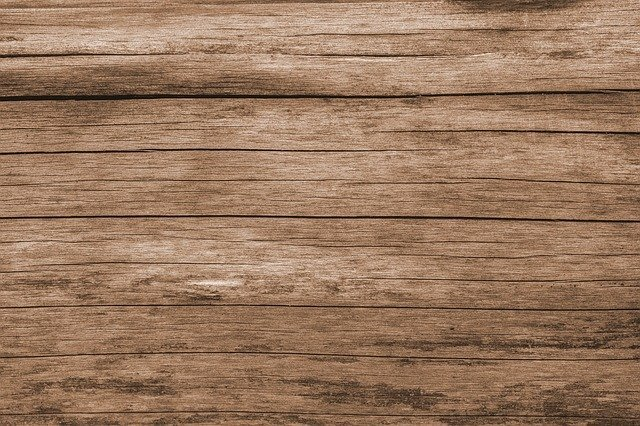

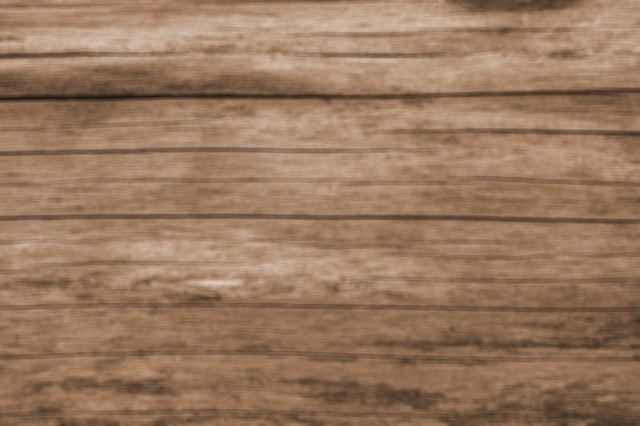

In [49]:
img_blur = cv2.blur(src=image, ksize=(5,5)) # Using the blur function to blur an image where ksize is the kernel size
 
# Display using cv2.imshow()
cv2_imshow(image)
cv2_imshow(img_blur)

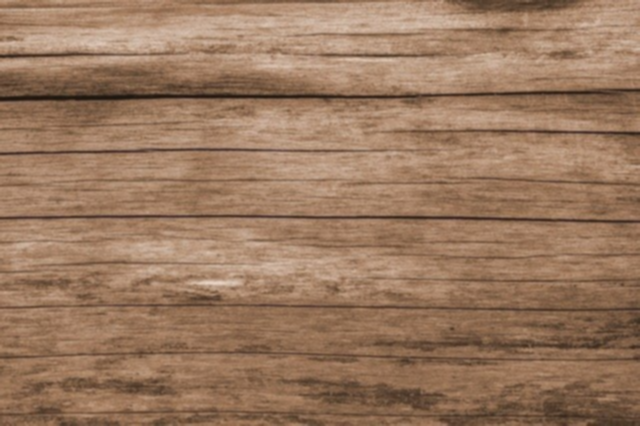

In [50]:
#cv2.GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType=BORDER_DEFAULT]]] )
#sigmaX	Kernel standard deviation along X-axis (horizontal direction).
#sigmaY	Kernel standard deviation along Y-axis (vertical direction). 
#Gaussian blur can be used in order to obtain a smooth grayscale digital image of a halftone print
gaussian_blur = cv2.GaussianBlur(src=image, ksize=(5,5),sigmaX=0, sigmaY=0)
cv2_imshow(gaussian_blur)

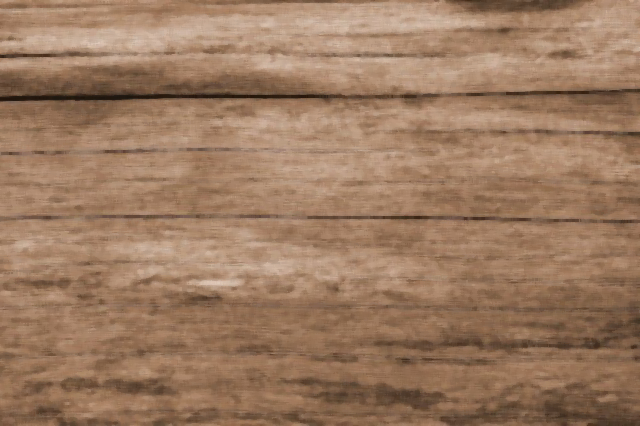

In [51]:
# It is used to remove salt and pepper noise in images
median = cv2.medianBlur(src=image, ksize=5)
cv2_imshow(median)

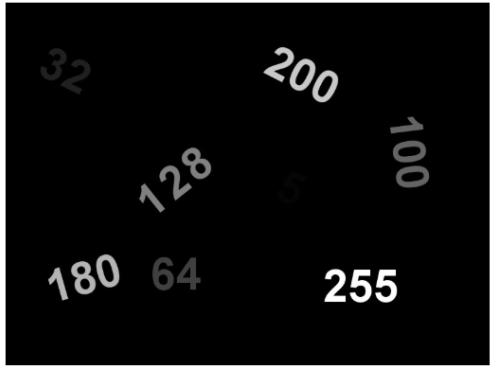

In [52]:
image = cv2.imread("threshold1.png")
cv2_imshow(image)

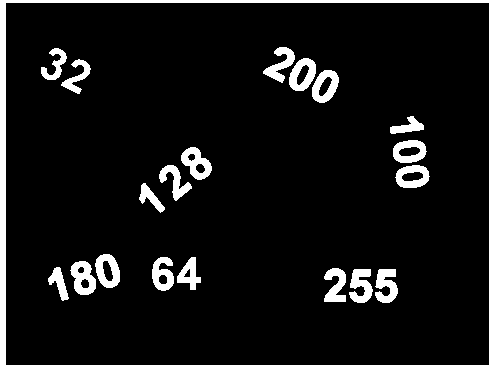

In [53]:
import cv2
# Read image
src = cv2.imread("threshold1.png", cv2.IMREAD_GRAYSCALE)
# Set threshold and maxValue
thresh = 15; 0,127
maxValue =255
 # try 
# Basic threshold example
th, dst = cv2.threshold(src, thresh, maxValue, cv2.THRESH_BINARY)
cv2_imshow(dst)

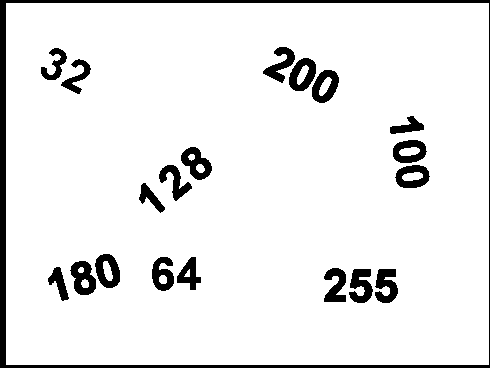

In [54]:
th, dst = cv2.threshold(src, thresh, maxValue, 
                        cv2.THRESH_BINARY_INV)
cv2_imshow(dst)

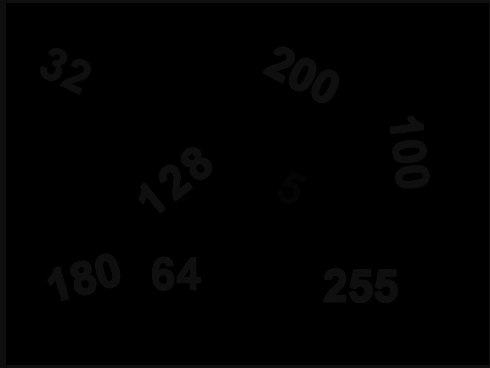

In [55]:
thresh = 15
maxvalue =255
th, dst = cv2.threshold(src, thresh, maxValue, cv2.THRESH_TRUNC)
cv2_imshow(dst)

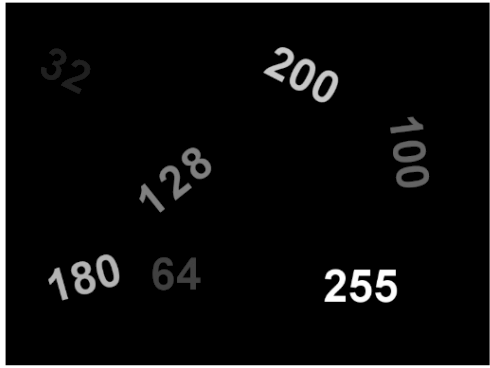

In [56]:
thresh = 15
maxvalue =255
th, dst = cv2.threshold(src, thresh, maxValue,cv2.THRESH_TOZERO)
cv2_imshow(dst)

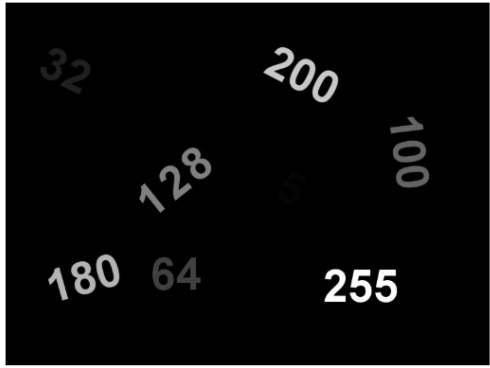

In [57]:
thresh = 0
maxvalue =255
th, dst = cv2.threshold(src, thresh, maxValue,cv2.THRESH_TOZERO)
cv2_imshow(dst)

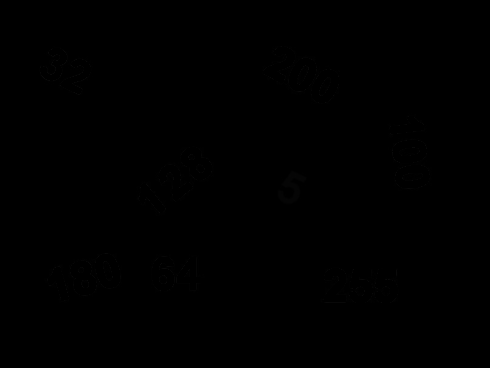

In [58]:
thresh = 10
maxvalue =100
th, dst = cv2.threshold(src, thresh, maxValue,cv2.THRESH_TOZERO_INV)
cv2_imshow(dst)

Obtained threshold:  105.0


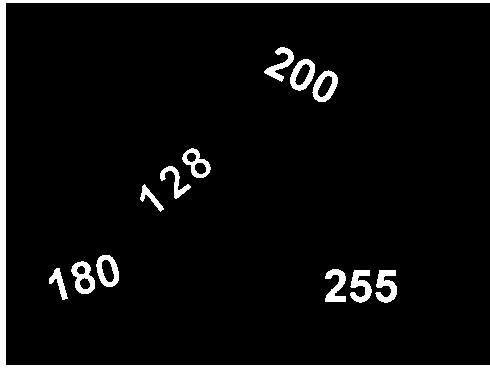

In [59]:
otsu_threshold, image_result = cv2.threshold(src, 0, 255, cv2.THRESH_OTSU)
print("Obtained threshold: ", otsu_threshold)
cv2_imshow(image_result)

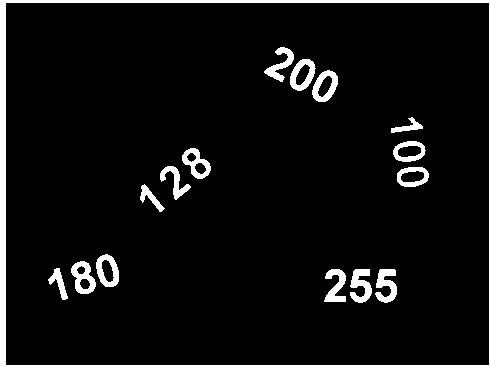

In [60]:
thresh = 81
maxvalue =255
th, dst = cv2.threshold(src, thresh, maxValue,cv2.THRESH_BINARY)
cv2_imshow(dst)

## Ostu's Algorithm

In [61]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow 

image = cv2.imread('boat.jpg')
# Set total number of bins in the histogram
bins_num = 256
 
# Get the image histogram
hist, bin_edges = np.histogram(image, bins=bins_num)
print(hist,bin_edges)
# Get normalized histogram if it is required
#hist.ravel() flattening the array
hist = np.divide(hist.ravel(), hist.max())
# Calculate centers of bins
bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.
print(bin_mids)

weight1 = np.cumsum(hist)
weight2 = np.cumsum(hist[::-1])[::-1]

mean1 = np.cumsum(hist * bin_mids) / weight1
# Get the class means mu1(t)
mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]
 
inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2
 
# Maximize the inter_class_variance function val
index_of_max_val = np.argmax(inter_class_variance)
 


threshold = bin_mids[:-1][index_of_max_val]
print("Otsu's algorithm implementation thresholding result: ", threshold)

[ 1028   494   495   587   616   599   591   542   477   516   464   439
   417   352   440   470   403   403   434   437   418   476   428   491
   556   600   562   789   743   818   908   804   830   616   508   453
   485   435   389   424   357   363   316   333   283   336   315   317
   303   297   306   313   315   285   342   331   346   331   350   346
   384   323   332   330   365   386   397   339   340   352   390   347
   409   382   399   381   417   450   447   408   408   458   427   433
   403   405   433   415   399   401   402   372   409   362   322   333
   366   323   280   307   309   273   303   290   292   263   306   261
   291   298   300   300   305   311   269   285   240   241   212   233
   210   184   178   163   137   170   149   138   137   122   143   120
   142   116   126   110   121   134   111    86   106   138   124   135
   123   125   145   151   121   109   102   139   157   152   150   211
   243   366   892   937  1351  1068  1216  1075  1

(array([ 1028.,   494.,   495.,   587.,   616.,   599.,   591.,   542.,
          477.,   516.,   464.,   439.,   417.,   352.,   440.,   470.,
          403.,   403.,   434.,   437.,   418.,   476.,   428.,   491.,
          556.,   600.,   562.,   789.,   743.,   818.,   908.,   804.,
          830.,   616.,   508.,   453.,   485.,   435.,   389.,   424.,
          357.,   363.,   316.,   333.,   283.,   336.,   315.,   317.,
          303.,   297.,   306.,   313.,   315.,   285.,   342.,   331.,
          346.,   331.,   350.,   346.,   384.,   323.,   332.,   330.,
          365.,   386.,   397.,   339.,   340.,   352.,   390.,   347.,
          409.,   382.,   399.,   381.,   417.,   450.,   447.,   408.,
          408.,   458.,   427.,   433.,   403.,   405.,   433.,   415.,
          399.,   401.,   402.,   372.,   409.,   362.,   322.,   333.,
          366.,   323.,   280.,   307.,   309.,   273.,   303.,   290.,
          292.,   263.,   306.,   261.,   291.,   298.,   300., 

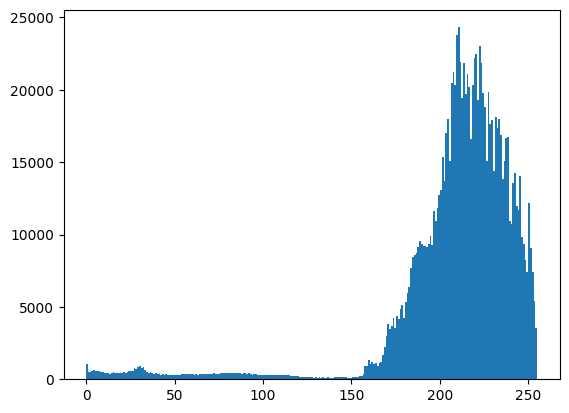

In [62]:
from matplotlib import pyplot as plt
plt.hist(image.ravel(),bins=256) #calculating histogram

In [63]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow 

image = cv2.imread('./boat.jpg',cv2.IMREAD_GRAYSCALE)

otsu_threshold, image_result = cv2.threshold(image,0,255, cv2.THRESH_OTSU)
print("Obtained threshold: ", otsu_threshold)

Obtained threshold:  132.0


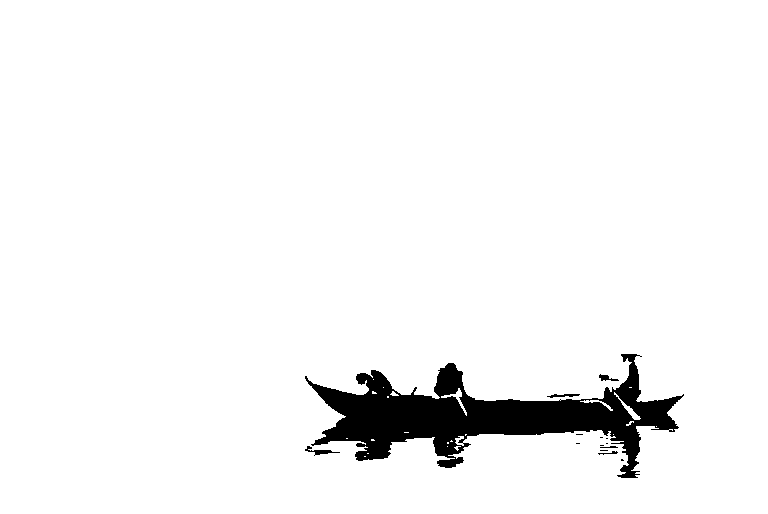

In [64]:
cv2_imshow(image_result)

# Histogram Equalization

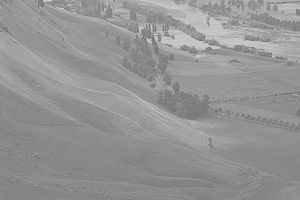

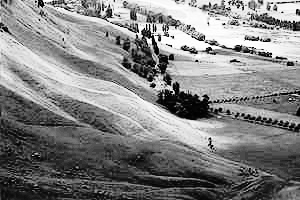

In [65]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow 
img = cv2.imread('hist1.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2_imshow(equ)

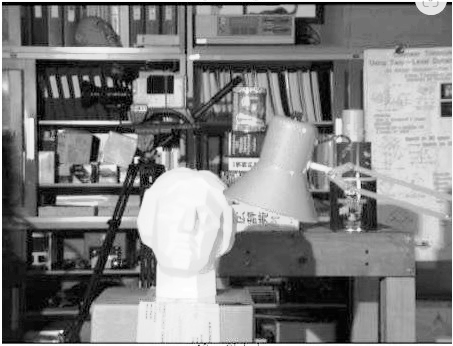

In [66]:
import cv2
from google.colab.patches import cv2_imshow 
import numpy as np
img = cv2.imread('clahe.jpg', cv2.IMREAD_GRAYSCALE)
#cv2_imshow(img)
equ = cv2.equalizeHist(img)
#res = np.hstack((img,equ)) #stacking images side-by-side
cv2_imshow(equ)

(array([ 231.,  238.,  171.,  234.,  284.,  356.,  625., 1254., 1953.,
        2187., 2305., 2943., 2608., 2157., 1988., 1999., 1909., 1886.,
        1796., 1810., 1682., 1600., 1501., 1360., 1248., 1248., 1373.,
        1627., 1773., 1937., 1608., 1349., 1302., 1307., 1243., 1222.,
        1231., 1138., 1074., 1079., 1120., 1121., 1200., 1283., 1446.,
        1546., 2165., 2571., 1743., 1386., 1061., 1116.,  909.,  957.,
         943.,  898.,  954.,  923.,  991.,  988., 1065., 1224., 1251.,
        1243., 1285., 1220., 1231., 1068., 1004.,  988.,  895.,  853.,
         855.,  870.,  843.,  848.,  916.,  915.,  917.,  820.,  732.,
         715.,  693.,  605.,  575.,  539.,  569.,  549.,  486.,  518.,
         502.,  500.,  505.,  533.,  500.,  508.,  595.,  613.,  574.,
         658.,  676.,  658.,  666.,  704.,  779.,  760.,  775.,  890.,
         828.,  913., 1040., 1182., 1277., 1145., 1191., 1105., 1080.,
        1155., 1214., 1131., 1136., 1008.,  810.,  673.,  619.,  518.,
      

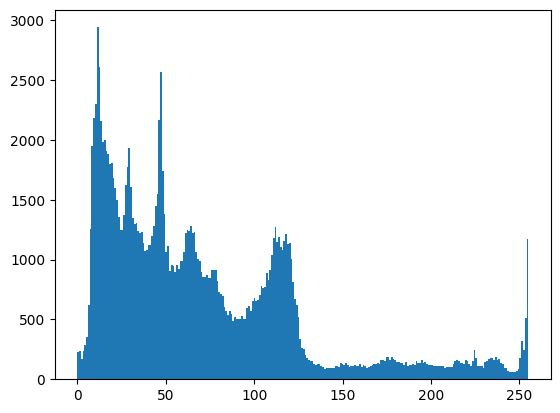

In [67]:
from matplotlib import pyplot as plt
plt.hist(img.ravel(),bins=256)

In [68]:
#### Contrast Limited Adaptive Histogram Equalization (CLAHE) 
#Wqualize images. CLAHE is a variant of Adaptive histogram equalization (AHE) which takes care of over-amplification of the contrast. 
#CLAHE operates on small regions in the image, called tiles, rather than the entire image. The neighboring tiles are then combined using bilinear interpolation to remove the artificial boundaries. 
img = cv2.imread('clahe.png', cv2.IMREAD_GRAYSCALE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)


# Edge Detection
* Sobel
* Canny


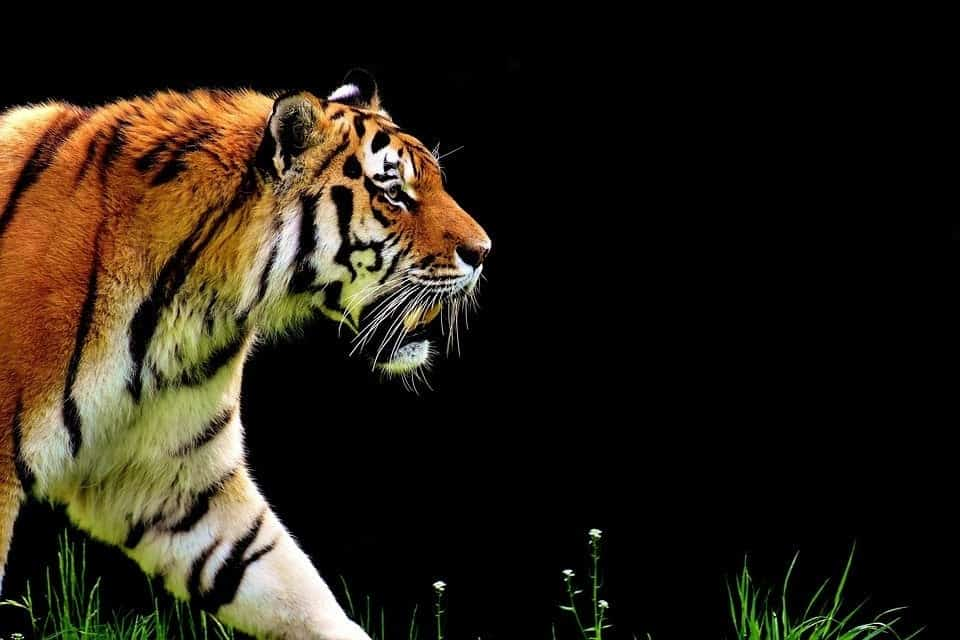

In [69]:
import cv2
from google.colab.patches import cv2_imshow 
# Read the original image
img = cv2.imread('tiger.jpg') 
# Display original image
cv2_imshow(img)

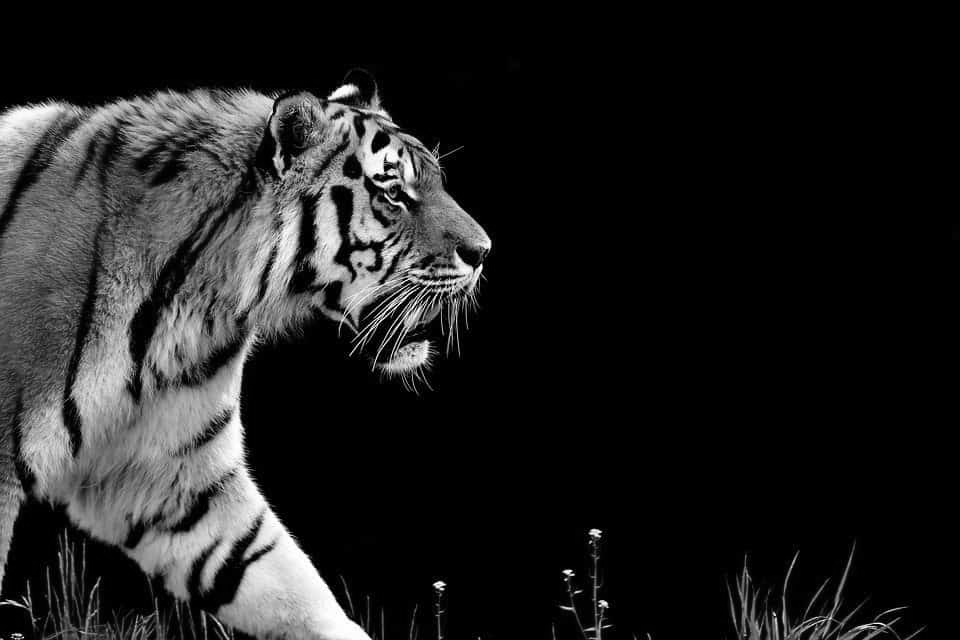

In [70]:
#Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_gray) 

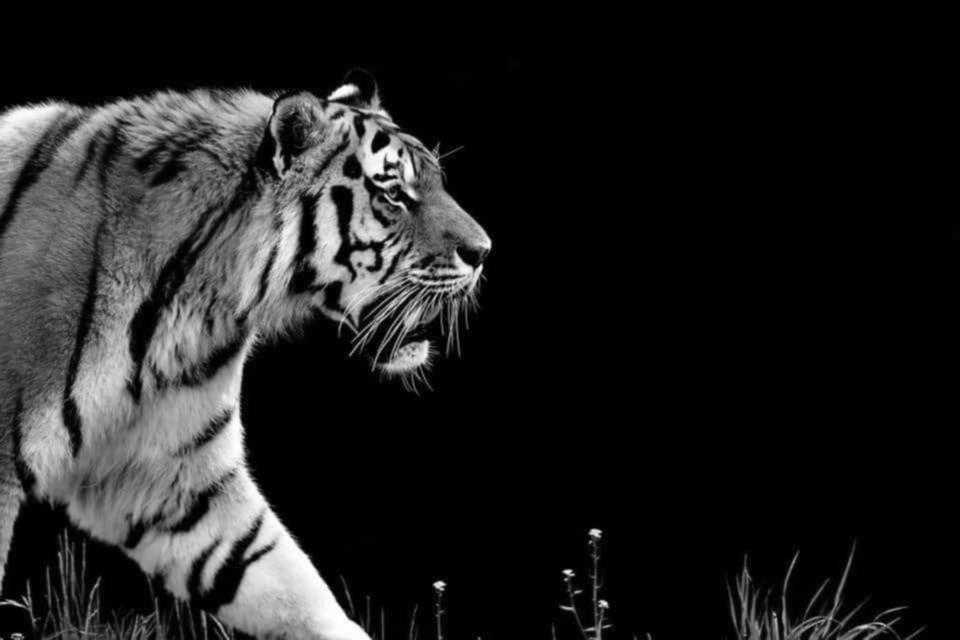

In [71]:
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 
cv2_imshow(img_blur) 

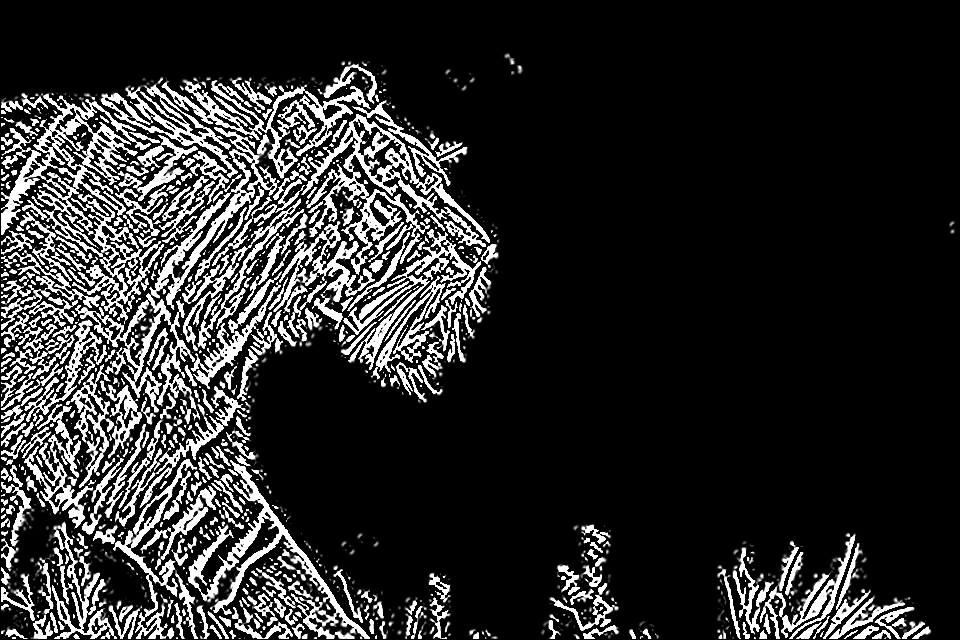

In [72]:
# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=7) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=7) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=7) # Combined X and Y Sobel Edge Detection
# Display Sobel Edge Detection Images
cv2_imshow(sobelxy)

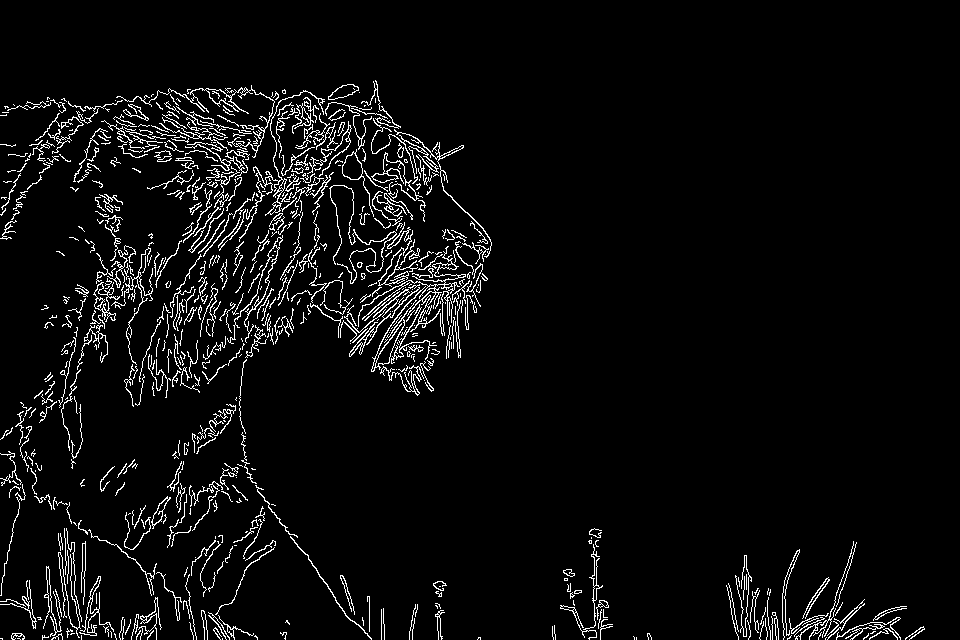

In [73]:
# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
# Display Canny Edge Detection Image
cv2_imshow(edges)
#cv2.waitKey(0)
 
#cv2.destroyAllWindows()

# Geometric Transformations

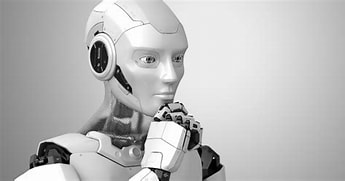

In [74]:
img = cv2.imread('robo.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

## Translation

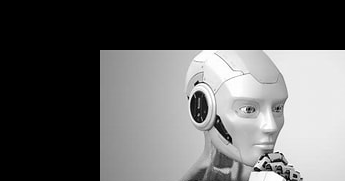

In [75]:
img = cv2.imread('robo.jpg', cv2.IMREAD_GRAYSCALE)
rows,cols = img.shape
M = np.float32([[1,0,100],[0,1,50]])
#Here we are shifting image 100 pixels to right on x axis and 50 pixels down on y -axis
dst = cv2.warpAffine(img,M,(cols,rows))
cv2_imshow(dst)

## Rotation

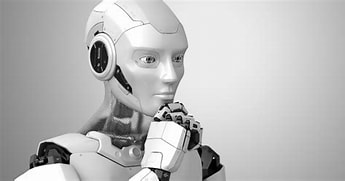

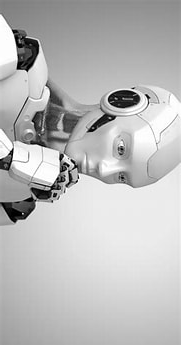

In [76]:
import cv2 
image =cv2.imread('robo.jpg',cv2.IMREAD_GRAYSCALE)
cv2_imshow(image)
image1 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
cv2_imshow(image1)

## Scaling


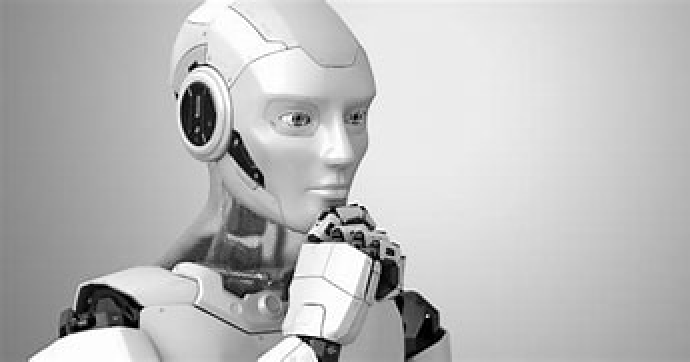

In [77]:
import numpy as np
import cv2
img = cv2.imread('robo.jpg',cv2.IMREAD_GRAYSCALE)
res = cv2.resize(img,None,fx=2, fy=2, 
                 interpolation = cv2.INTER_AREA)
cv2_imshow(res)

## Shear

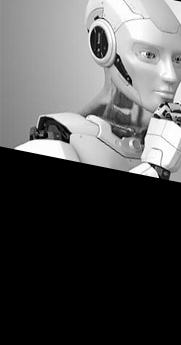

In [78]:
img = cv2.imread('robo.jpg',cv2.IMREAD_GRAYSCALE)
M2 = np.float32([[1, 0, 0], [0.2, 1, 0]])
W,H = img.shape
M2[0,2] = -M2[0,1] * W/2
M2[1,2] = -M2[1,0] * H/2
aff2 = cv2.warpAffine(img, M2, (W, H))
cv2_imshow(aff2)

In [79]:
M2 = np.float32([[1, 0, 0], [0.2, 1, 0]])
print(M2)

[[1.  0.  0. ]
 [0.2 1.  0. ]]


In [85]:
-M2[0,1] * W/2

-0.0

In [86]:
-M2[1,0] * H/2

-34.50000051409006

In [80]:
W,H

(181, 345)

In [81]:
print(M2[0,1])

0.0


In [87]:
M2[1,2]

0.0

In [83]:
M2

array([[1. , 0. , 0. ],
       [0.2, 1. , 0. ]], dtype=float32)

In [84]:
aff2

array([[145, 143, 141, ...,   0,   0,   0],
       [146, 143, 141, ..., 215, 163, 119],
       [146, 144, 142, ..., 233, 234, 236],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)